# Creadit Card Fraud Detection Using Machine Learning Algorithms:

1. DecisionTreeClassifier
2. Random Forest Classifier
3. KNeighbors Classifier
4. GaussianNB Classifier
5. SVM Classifier

# And Deep Learning:

1. Tensorflow, Keras



# DataSet Loading
 Data set can be downloaded from 
 https://www.kaggle.com/isaikumar/creditcardfraud
 
 Features: this dataset includes 31 features:
 1. Time : Number of seconds elapsed between this transaction and the first transaction in the dataset
 2. Amount: Amount of the Transactions
 3. V1 to V28 PCA tranformed (to protect user identities and sensitive features) numerical values 
 3. Class: 
      1: Fraud Transanction, 2: Normal Transaction 
 

# Required Libraries

In [1]:
import pandas as pd
import pickle
from scipy import stats
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import model_selection
# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from matplotlib import cm as cm
import seaborn as sns # used for plot interactive graph.
from scipy.stats import pearsonr
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
import tensorflow as tf
import warnings
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
import torch, torch.nn as nn, torch.nn.functional as F
from torch.autograd import Variable
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch.utils.data as data_utils
from pytorch_model_summary import summary
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


# Loading DataSet

In [2]:
df=pd.read_csv("C://Desktop//Dataset//691689_1211536_bundle_archive//creditcard.csv")

# Exploring Data

In [3]:
df.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.shape

(284807, 31)

# Check to see how blance the data is

In [6]:
frauds=df[df.Class==1]
normal=df[df.Class==0]
print("Size of Fraudlent Data",frauds.shape)
print("Size of Normal Data",normal.shape)

Size of Fraudlent Data (492, 31)
Size of Normal Data (284315, 31)


In [7]:
df.isnull().values.sum()

0

# Depictine the number of Normal and Fraud Transactions

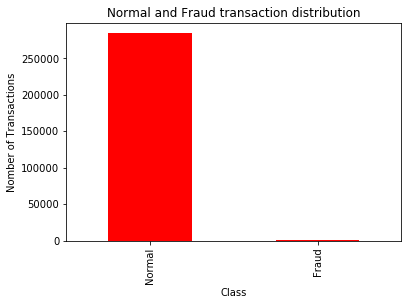

In [8]:
Fraud_Normal_counts= pd.value_counts(df['Class'])
Fraud_Normal_counts.plot(kind = 'bar', color="Red")
plt.title("Normal and Fraud transaction distribution")
plt.xticks(range(2), ["Normal", "Fraud"])
plt.xlabel("Class")
plt.ylabel("Nomber of Transactions");

# plotting the Amount of the transactions in both classes

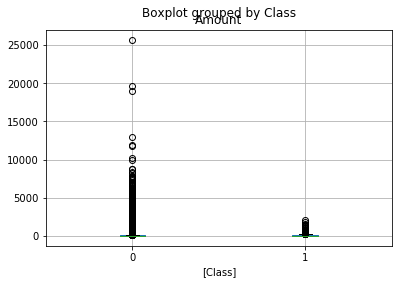

In [10]:
boxplot = df.boxplot(column=['Amount'], by=['Class'])

The above figures do not give us much information about anomaly data (Amount of normal and fraud transactions)

Lets see if there is something about the time fraud happened

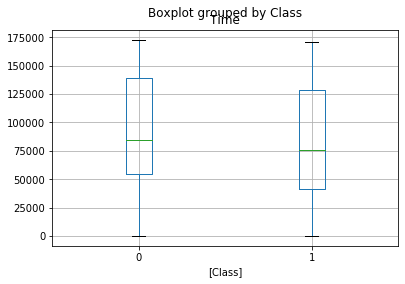

In [11]:
boxplot = df.boxplot(column=['Time'], by=['Class'])

Nothing notable can be seen!!!

# Let's plot the normal and fraudulent transactions (amount) against time.

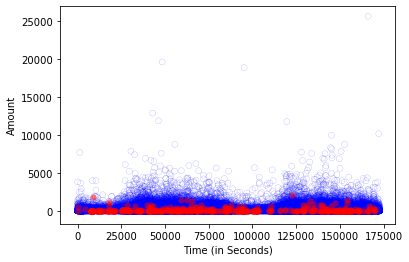

In [12]:
plt.scatter(df.loc[df['Class'] == 0]['Time'], df.loc[df['Class'] == 0]['Amount'], label="Class #0", alpha=0.7, linewidth=0.15, facecolors='none', edgecolors='b')
plt.scatter(df.loc[df['Class'] == 1]['Time'], df.loc[df['Class'] == 1]['Amount'], label="Class #1", alpha=0.5, linewidth=0.15,c='r')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

# find out the correlated features

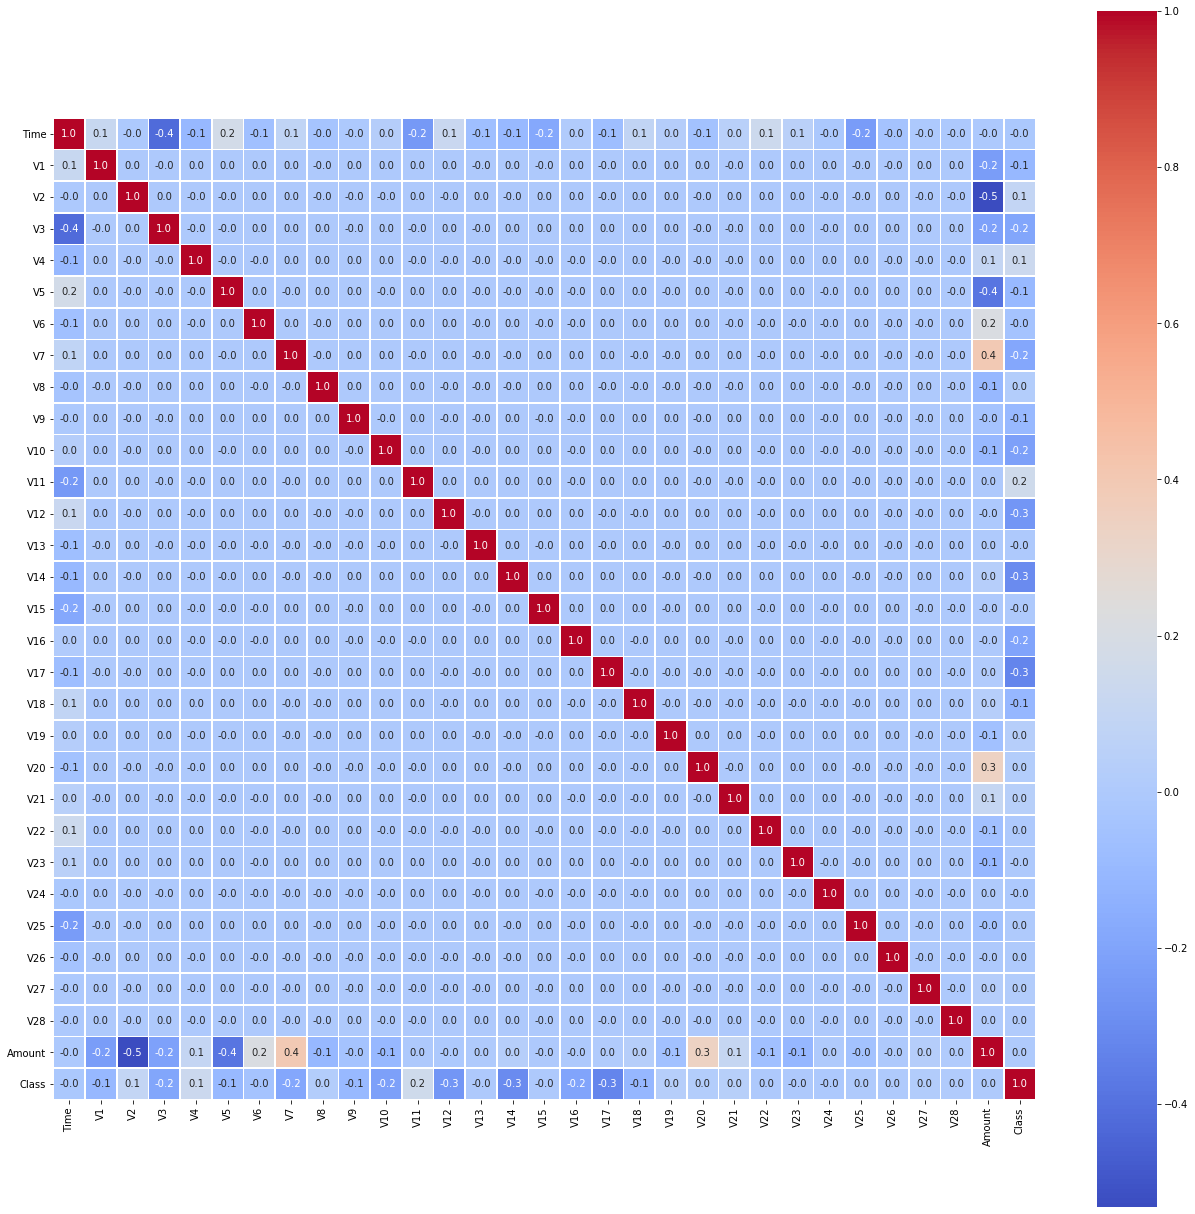

In [13]:
correlation = df.corr() 
f,ax = plt.subplots(figsize=(22, 22))
sns.heatmap(correlation, cbar = True,  square = True, annot = True, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.7, ax=ax)

No notable correlation can be seen between features

Uncorrelated data are poentially more useful


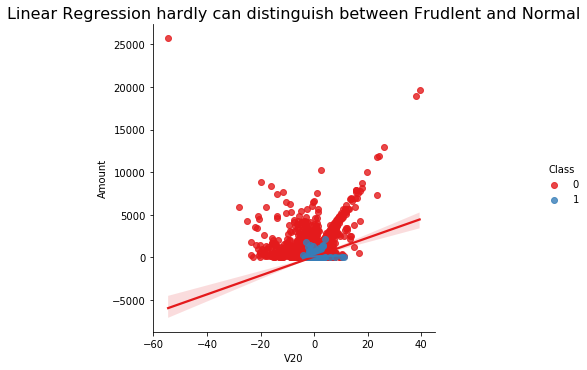

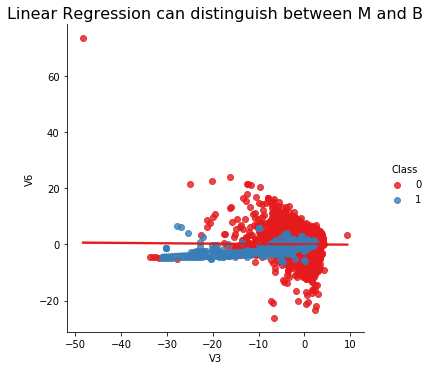

In [11]:
s = sns.lmplot(x='V20', y='Amount',data=df, hue='Class',  palette='Set1')
plt.title('Linear Regression hardly can distinguish between Frudlent and Normal', size=16)

s = sns.lmplot(x='V3', y='V6',data=df, hue='Class',  palette='Set1')
plt.title('Linear Regression can distinguish between M and B', size=16)

print('Uncorrelated data are poentially more useful')
plt.show()

# Removing Correlated features

Besides duplicate features, a dataset can also include correlated features.
Correlation is defined as a measure of the linear relationship between two quantitative variables, like height and weight. You could also define correlation is a measure of how strongly one variable depends on another.
A high correlation is often a useful property—if two variables are highly correlated, we can predict one from the other. Therefore, we generally look for features that are highly correlated with the target, especially for linear machine learning models.
However, if two variables are highly correlated among themselves, they provide redundant information in regards to the target. Essentially, we can make an accurate prediction on the target with just one of the redundant variables.
In these cases, the second variable doesn’t add additional information, so removing it can help to reduce the dimensionality and also the added noise (ref: https://heartbeat.fritz.ai/hands-on-with-feature-selection-techniques-filter-methods-f248e0436ce5).


In [12]:
#removing Correlated features
correlation = df.corr() 
columns = np.full((correlation.shape[0],), True, dtype=bool)
for i in range(correlation.shape[0]):
    for j in range(i+1, correlation.shape[0]):
        if correlation.iloc[i,j] >= 0.7 or correlation.iloc[i,j] <= -0.7:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
df1= df[selected_columns]

print("number of removed features: ", len(df.columns.unique()) - len(selected_columns))

number of removed features:  0


# Normalizing the data

In [13]:
# we dont need time any more
data = df1.drop(['Time'], axis=1)

data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

In [14]:
df1.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

# Preparing data for feeding our models

In [15]:
X=df.drop(["Class"],axis=1)
Y=df.Class

# Splitting the data

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)

# Model Selection

# 1. Random Forest Classifier

In [17]:
classifier = RandomForestClassifier(random_state = 5)
classifier.fit(X_train, Y_train)
classifier.score(X_test, Y_test)

0.9995435553526912

# Depicting Important Features in this Classification.
 
Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable.

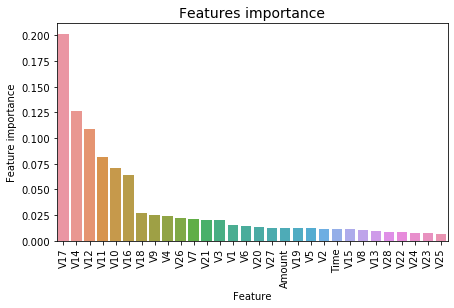

In [21]:
predictors=X.columns
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': classifier.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

# K_Fold Cross Validation
Cross-validation is a technique to evaluate predictive models by partitioning the original sample into a training set to train the model, and a test set to evaluate it.
In k-fold cross-validation, the original sample is randomly partitioned into k equal size subsamples. One of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k-1 subsamples are used as training data. The cross-validation process is then repeated k times (the folds), with each of the k subsamples used exactly once as the validation data. The k results from the folds can then be averaged (or otherwise combined) to produce a single estimation. The advantage of this method is that all observations are used for both training and validation, and each observation is used for validation exactly once (ref: https://www.openml.org/a/estimation-procedures/1).

In [22]:
seed = 2
kfold = model_selection.KFold(n_splits=10, random_state=None)
scoring = 'accuracy'
results = model_selection.cross_val_score(classifier, X_train, Y_train, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)", (results.mean(), results.std()))

Accuracy: %.3f (%.3f) (0.9995485654410107, 9.248568700122147e-05)


# 2. Decision Tree Classifier Classifier

In [23]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)
classifier.score(X_test, Y_test)

0.9992860737567735

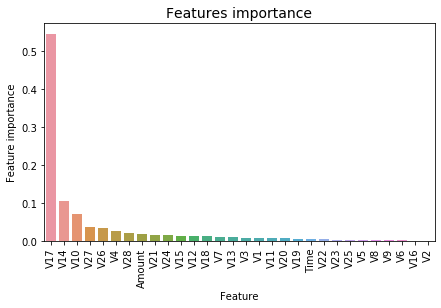

In [24]:
# Feature Importance
predictors=X.columns
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': classifier.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()

In [25]:
# KFold Cross Validation 
seed = 2
kfold = model_selection.KFold(n_splits=10, random_state=None)
scoring = 'accuracy'
results = model_selection.cross_val_score(classifier, X_train, Y_train, cv=kfold, scoring=scoring)
print("Accuracy: %.3f (%.3f)", (results.mean(), results.std()))

Accuracy: %.3f (%.3f) (0.9992175130956251, 0.0001636097595627572)


# Confusion Matrix
confusion matrix is another method to evaluate the accuracy of a classification
By definition a confusion matrix C is such that C_{i, j} is equal to the number of observations known to be in group i but predicted to be in group j.

In [26]:
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[85270,    26],
       [   35,   112]], dtype=int64)

# Other Machine Learning Algorithms

In [27]:
ML_Models = []

ML_Models.append(('DecisionTree Classifier', DecisionTreeClassifier()))
ML_Models.append(('Support Vector Machine', SVC())) 
ML_Models.append(('Gaussian Naive Baysian Classifier', GaussianNB()))
ML_Models.append(('KNeighbors Classifier', KNeighborsClassifier()))
ML_Models.append(('Random Forest Classifier', RandomForestClassifier()))

from sklearn.model_selection import KFold
import time
from sklearn.model_selection import cross_val_score
num_folds = 10
results = []
names = []

for name, model in ML_Models:
    kfold = KFold(n_splits=num_folds, random_state=None)
    start = time.time()
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    end = time.time()
    results.append(cv_results)
    print( "%s: %f (std: %f) (running time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

DecisionTree Classifier: 0.999212 (std: 0.000151) (running time: 104.736031)
Support Vector Machine: 0.998269 (std: 0.000260) (running time: 62.218999)
Gaussian Naive Baysian Classifier: 0.992712 (std: 0.000555) (running time: 1.755004)
KNeighbors Classifier: 0.998370 (std: 0.000266) (running time: 33.700997)
Random Forest Classifier: 0.999549 (std: 0.000098) (running time: 1003.357006)


# Neural Network Models
1. Tensorflow.keras
2. Pytorch

# Keras

In [18]:
NCOLS=X_train.shape[1]
features= X_train  
CY_train= to_categorical(Y_train)
n_cols = features.shape[1]

In [19]:
CY_train.shape

(199364, 2)

In [20]:
model = keras.models.Sequential([
    keras.layers.Dense(200, activation='relu', input_shape = (NCOLS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(2, activation="softmax")
])
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy']) 
early_stopping_monitor =EarlyStopping(patience=10)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               6200      
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                

In [23]:
history=model.fit(features, CY_train, validation_split=0.3, epochs=5, batch_size=5,
                  callbacks = [early_stopping_monitor])

Train on 139554 samples, validate on 59810 samples
Epoch 1/5
139554/139554 [==============================] - 34s 245us/step - loss: 0.5489 - accuracy: 0.9980 - val_loss: 0.0130 - val_accuracy: 0.9982
Epoch 2/5
139554/139554 [==============================] - 34s 242us/step - loss: 0.1743 - accuracy: 0.9982 - val_loss: 0.0136 - val_accuracy: 0.9982
Epoch 3/5
139554/139554 [==============================] - 34s 242us/step - loss: 0.9362 - accuracy: 0.9981 - val_loss: 0.0130 - val_accuracy: 0.9982
Epoch 4/5
139554/139554 [==============================] - 34s 244us/step - loss: 0.0480 - accuracy: 0.9982 - val_loss: 0.0130 - val_accuracy: 0.9982
Epoch 5/5
139554/139554 [==============================] - 34s 245us/step - loss: 0.6404 - accuracy: 0.9982 - val_loss: 0.0130 - val_accuracy: 0.9982
